In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Baca file CSV dan persiapkan dataset
df = pd.read_csv('data/nutrition_values.csv')
nutrition_info = {}
for index, row in df.iterrows():
    nutrition_info[row['Name']] = {
        'Calories': row['Calories (per 100g)'],
        'Carbohydrates': row['Carbohydrates (g)'],
        'Protein': row['Protein (g)'],
        'Fat': row['Fat (g)'],
        'Fiber': row['Fiber (g)'],
        'Vitamin C': row['Vitamin C (mg)'],
        'Zinc': row['Zinc (mg)'],
        'Potassium': row['Potassium (mg)'],
        'Iron': row['Iron (mg)'],
        'Calcium': row['Calcium (mg)']
    }
labels = list(nutrition_info.keys())

In [18]:
# Fungsi untuk mendapatkan jumlah gambar dalam setiap label
def count_images_per_label(root_folder):
    labels = os.listdir(root_folder)
    counts = []
    for label in labels:
        label_folder = os.path.join(root_folder, label)
        count = len(os.listdir(label_folder))
        counts.append((label, count))
    return counts

In [3]:
# Tentukan direktori untuk data train dan data test
train_dir = 'data/train'
test_dir = 'data/test'

# Tentukan ukuran gambar yang akan diinputkan ke model
image_size = (100, 100)
batch_size = 32

# Persiapkan data train dan data test
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

Found 15748 images belonging to 42 classes.
Found 3122 images belonging to 42 classes.


Jumlah gambar per label pada dataset training:
            Label  Jumlah Gambar
0           Apple            100
1         Apricot            100
2          Banana            100
3           Beans            100
4        Beetroot            100
5     Bell Pepper            450
6    Bitter Gourd            450
7     Black Berry            450
8   Black Current            450
9       Blueberry            450
10   Bottle Gourd            450
11       Broccoli            450
12        Cabbage             92
13         Carrot            450
14    Cauliflower            450
15         Chilli            450
16           Corn            150
17      Cranberry            450
18       Cucumber            450
19  Custard Apple            450
20          Dates            450
21   Dragon Fruit            450
22            Fig            450
23         Garlic            450
24         Ginger             68
25         Grapes            450
26          Guava            450
27      Jackfruit            

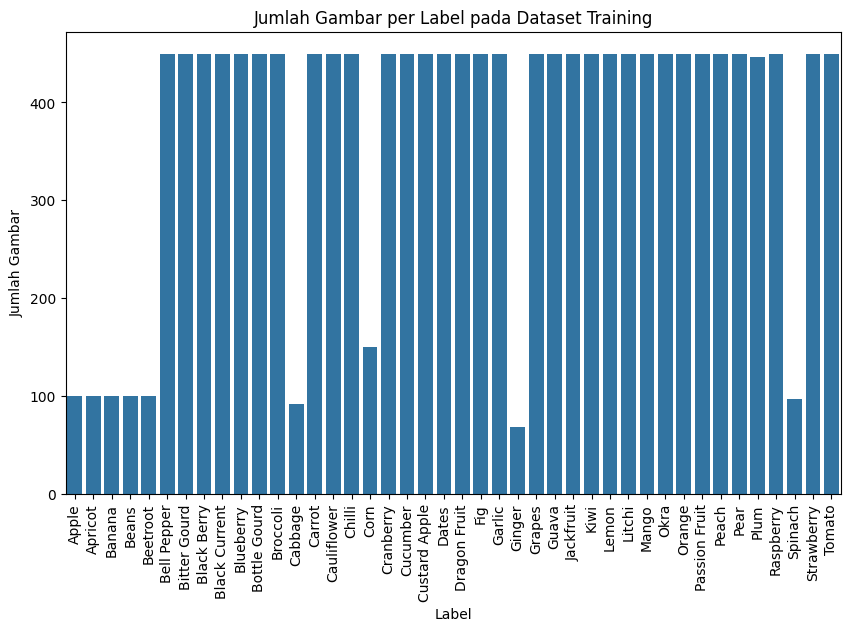

In [19]:
# Analisis EDA untuk folder train
train_counts = count_images_per_label(train_dir)
train_counts_df = pd.DataFrame(train_counts, columns=['Label', 'Jumlah Gambar'])
print("Jumlah gambar per label pada dataset training:")
print(train_counts_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Jumlah Gambar', data=train_counts_df)
plt.xticks(rotation=90)  # Mengubah rotasi label menjadi vertikal
plt.title("Jumlah Gambar per Label pada Dataset Training")
plt.show()

Jumlah gambar per label pada dataset testing:
            Label  Jumlah Gambar
0           Apple             20
1         Apricot             20
2          Banana             20
3           Beans             20
4        Beetroot             20
5     Bell Pepper             90
6    Bitter Gourd             90
7     Black Berry             90
8   Black Current             90
9       Blueberry             90
10   Bottle Gourd             90
11       Broccoli             90
12        Cabbage             20
13         Carrot             90
14    Cauliflower             90
15         Chilli             90
16           Corn             20
17      Cranberry             90
18       Cucumber             90
19  Custard Apple             90
20          Dates             90
21   Dragon Fruit             90
22            Fig             90
23         Garlic             90
24         Ginger             18
25         Grapes             90
26          Guava             90
27      Jackfruit             

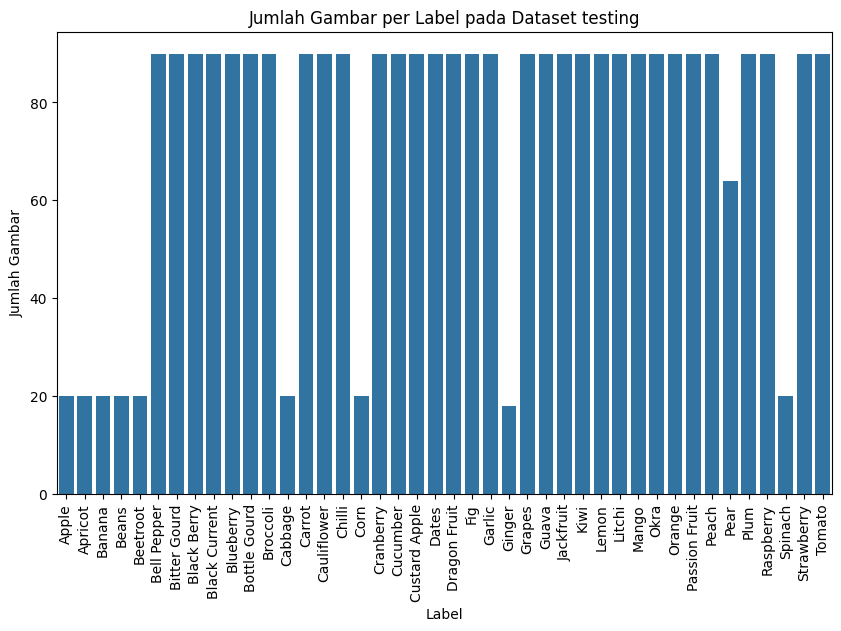

In [20]:
# Analisis EDA untuk folder test
test_counts = count_images_per_label(test_dir)
test_counts_df = pd.DataFrame(test_counts, columns=['Label', 'Jumlah Gambar'])
print("Jumlah gambar per label pada dataset testing:")
print(test_counts_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Jumlah Gambar', data=test_counts_df)
plt.xticks(rotation=90)  # Mengubah rotasi label menjadi vertikal
plt.title("Jumlah Gambar per Label pada Dataset testing")
plt.show()

In [4]:
# Fungsi untuk membuat model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [34]:
# Function to display model summary in a table format
def display_model_summary(model):
    # Get the summary as a string
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    summary_string = "\n".join(stringlist)

    # Split the summary string by lines
    lines = summary_string.split('\n')

    # Extract the header and rows
    header = lines[1]
    rows = lines[3:-4]

    # Print the header
    print(f"┏{'━' * 80}┓")
    print(f"┃ {header:<78} ┃")
    print(f"┡{'━' * 80}┩")

    # Print the rows
    for row in rows:
        print(f"│ {row:<78} │")

    # Print the bottom of the table
    print(f"└{'━' * 80}┘")

# Display model summary
display_model_summary(model)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩   │
│ │ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │   │
│ ├─────────────────────────────────┼────────────────────────┼───────────────┤   │
│ │ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │   │
│ ├─────────────────────────────────┼────────────────────────┼───────────────┤   │
│ │ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │   │
│ ├─────────────────────────────────┼────────────────────────┼───────────────┤   │
│ │ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │   │
│ ├─────────────────────────────────┼────────────────────────┼───────────────┤   │
│ │ 

In [6]:
# Tentukan jumlah kelas (jumlah buah)
num_classes = len(train_generator.class_indices)

# Buat model
model = create_model(input_shape=(100, 100, 3), num_classes=num_classes)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.3676 - loss: 2.2741 - val_accuracy: 0.6749 - val_loss: 1.0181
Epoch 2/10
  1/492 ━━━━━━━━━━━━━━━━━━━━ 4:27 544ms/step - accuracy: 0.5938 - loss: 1.0929

c:\Users\m007d\anaconda3\envs\eka_notebook\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.5938 - loss: 1.0929 - val_accuracy: 0.8333 - val_loss: 0.9040
Epoch 3/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 269s 544ms/step - accuracy: 0.6974 - loss: 0.9743 - val_accuracy: 0.7622 - val_loss: 0.7966
Epoch 4/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7188 - loss: 0.7932 - val_accuracy: 0.8333 - val_loss: 0.7751
Epoch 5/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 299s 607ms/step - accuracy: 0.8033 - loss: 0.6357 - val_accuracy: 0.8840 - val_loss: 0.4164
Epoch 6/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.8750 - loss: 0.4990 - val_accuracy: 0.7778 - val_loss: 0.5879
Epoch 7/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 263s 533ms/step - accuracy: 0.8749 - loss: 0.4004 - val_accuracy: 0.9336 - val_loss: 0.2362
Epoch 8/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.9062 - loss: 0.2295 - val_accuracy: 0.9444 - val_loss: 0.1664
Epoch 9/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 297s 603ms/step - accuracy: 0.9359 - loss: 0.2049 - val

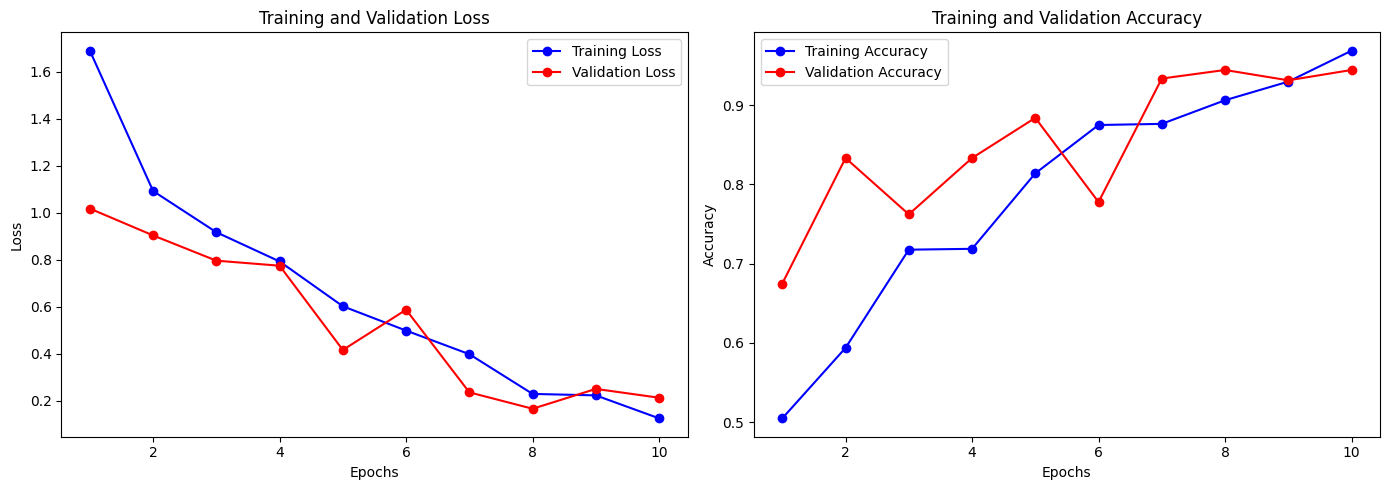

In [35]:
# Extract loss and accuracy from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Simpan model
model.save('fruit_classifier_model.h5')

In [14]:
# Konversi model menjadi format JSON
model_json = model.to_json()

# Simpan model dalam format JSON
with open("fruit_classifier_model.json", "w") as json_file:
    json_file.write(model_json)

In [25]:
# Load model
model = tf.keras.models.load_model('fruit_classifier_model.h5')

In [26]:
# Fungsi untuk memprediksi kelas gambar dan mendapatkan informasi nutrisi
def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    
    # Get nutrition information
    nutrition_data = nutrition_info[predicted_class]
    
    return predicted_class, confidence, nutrition_data

In [24]:
# Contoh penggunaan
image_path = 'data/test/Banana/Banana109.jpg'
predicted_class, confidence, nutrition_data = predict_image_class(image_path)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)
print("Nutrition Information:", nutrition_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Predicted Class: Banana
Confidence: 0.9999745
Nutrition Information: {'Calories': 89, 'Carbohydrates': 23.0, 'Protein': 1.3, 'Fat': 0.3, 'Fiber': 2.6, 'Vitamin C': 8.7, 'Zinc': 0.2, 'Potassium': 358, 'Iron': 0.26, 'Calcium': 5}
